<a href="https://colab.research.google.com/github/Nagano11/bank_churn/blob/main/bank_churn_analysis_rev01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This dataset was downloaded from Kaggle with purpose of Data Science study.

Source of dataset: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

The below analysis is being done with the goal of clarifying the reasons of the churn, how to trace them and maybe finding a solution. In order to do so, I will be using pandas, numpy, seaborn, sklearn and scipy libraries for exploratory analysis and linear regression.

# Importing libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics, svm
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Reading and understanding the dataset

**About Dataset**

RowNumber — corresponds to the record (row) number and has no effect on the output.

CustomerId — contains random values and has no effect on customer leaving the bank.

Surname — the surname of a customer has no impact on their decision to leave the bank.

CreditScore — can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

Geography— a customer’s location can affect their decision to leave the bank.

Gender — it’s interesting to explore whether gender plays a role in a customer leaving the bank.

Age — this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

Tenure — refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.

Balance — also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.

NumOfProducts — refers to the number of products that a customer has purchased through the bank.

HasCrCard — denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.

IsActiveMember — active customers are less likely to leave the bank.

EstimatedSalary — as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.

Exited — whether or not the customer left the bank.

Complain — customer has complaint or not.

Satisfaction Score — Score provided by the customer for their complaint resolution.

Card Type — type of card hold by the customer.

Points Earned — the points earned by the customer for using credit card.

**Acknowledgements**

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

Source: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn

In [70]:
data = pd.read_csv('Customer-Churn-Records.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Checking the quality of the dataset

In [71]:
data.shape

(10000, 18)

In [72]:
data.count()

RowNumber             10000
CustomerId            10000
Surname               10000
CreditScore           10000
Geography             10000
Gender                10000
Age                   10000
Tenure                10000
Balance               10000
NumOfProducts         10000
HasCrCard             10000
IsActiveMember        10000
EstimatedSalary       10000
Exited                10000
Complain              10000
Satisfaction Score    10000
Card Type             10000
Point Earned          10000
dtype: int64

No NaN values.

In [73]:
data.dtypes

RowNumber               int64
CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [74]:
data['CustomerId'].nunique()

10000

### Data treatment
(1) Excluding unnecessary columns;

(2) Changing the name of columns to lower and snake case.

In [75]:
data.drop(columns=['RowNumber', 'Surname', 'CustomerId'], inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [76]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')

In [77]:
columns_names = {'CustomerId':'customer_id',
                 'CreditScore':'credit_score',
                 'Geography':'geography',
                 'Gender':'gender',
                 'Age':'age',
                 'Tenure':'tenure',
                 'Balance':'balance',
                 'NumOfProducts':'num_of_products',
                 'HasCrCard':'has_crd_card',
                 'IsActiveMember':'is_active_member',
                 'EstimatedSalary':'estimated_salary',
                 'Exited':'exited',
                 'Complain':'complain',
                 'Satisfaction Score':'satisfaction_score',
                 'Card Type':'card_type',
                 'Point Earned':'point_earned'}

data.rename(columns=columns_names, inplace=True)
data.head()

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_crd_card,is_active_member,estimated_salary,exited,complain,satisfaction_score,card_type,point_earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Exploratory Analysis

In [78]:
print(f'Share of Gender \n{data.gender.value_counts(normalize=True).mul(100).round(2).astype(str) + "%"} \n \n\
Share of churn \n{data.exited.value_counts(normalize=True).mul(100).round(2).rename(index={0:"Hasnt exited", 1:"Has exited"}).astype(str) + "%"} \n \n\
Share of country \n{data.geography.value_counts(normalize=True).mul(100).round(2).astype(str) + "%"} \n \n\
Share of Credit Card type \n{data.card_type.value_counts(normalize=True).mul(100).round(2).astype(str) + "%"}')

Share of Gender 
Male      54.57%
Female    45.43%
Name: gender, dtype: object 
 
Share of churn 
Hasnt exited    79.62%
Has exited      20.38%
Name: exited, dtype: object 
 
Share of country 
France     50.14%
Germany    25.09%
Spain      24.77%
Name: geography, dtype: object 
 
Share of Credit Card type 
DIAMOND     25.07%
GOLD        25.02%
SILVER      24.96%
PLATINUM    24.95%
Name: card_type, dtype: object


The client' share of gender is led by male and the majority are in France. As for credit card type, the share is somehow balanced between the four types.

In [79]:
data.describe().round(2)

,credit_score,age,tenure,balance,num_of_products,has_crd_card,is_active_member,estimated_salary,exited,complain,satisfaction_score,point_earned
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.0,10000.0,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.2,0.2,3.01,606.52
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.4,0.4,1.41,225.92
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.0,0.0,1.00,119.00
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.0,0.0,2.00,410.00
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.92,0.0,0.0,3.00,605.00
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.0,0.0,4.00,801.00
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0,1.0,5.00,1000.00


By analyzing the above table, we have:

(1) Credit Score - The average is same as the median, and is high close to the maximum score.

(2) Age - The average is in the range of a professional stability which provides a good indicator. The minimum age is 18, which in most countries is considered as an adult.

(3) Tenure - The average is in a good level, same as the median.

(4) Balance - The average differs from the median, and the first quartile (Q1) presents only 0, which may say that this data is disperse.

(5) Number of Products - The acquisition of products was at least one for all customers.

(6) Has Credit card - As the average of this data is 0.7 from 0 (no) to 1 (yes), which indicates that most of the clients owns a credit card.

(7) Active clients - The average is almost 0.51 from 0 (no) to 1 (yes), which indicates the a little less than half of the clients in this dataset aren't active clients of this bank.

(8) Estimated Salary - It seems that this data follows a normal distribution where the average (100k) is the same sa median.

(9) Exited - The average seems to be low (i.e. 0.2).

(10) Complain - Same as exited, showing a low average.

(11) Satisfaction Score - From a scale of 1 to 5, the average is in 3, which depending.

(12) Point Earned - The maximum is 1000 points. The average (605) is close to the mean, which indicates a possible normal distribution.

### Converting string values to integers

**Gender**

Male = 0

Female = 1


**Geography**

France = 1

Germany = 2

Spain = 3


**Card type**

Diamond = 1

Gold = 2

Silver = 3

Platinum = 4

In [80]:
str_to_int_conversion = {'Male':0, 'Female':1, 'France':1, 'Germany':2, 'Spain':3, 'DIAMOND':1, 'GOLD':2, 'SILVER':3, 'PLATINUM':4}

data.replace(str_to_int_conversion, inplace=True)

## Graph statistical analysis

### Churn analysis

(0.0, 1.0, 0.0, 1.0)

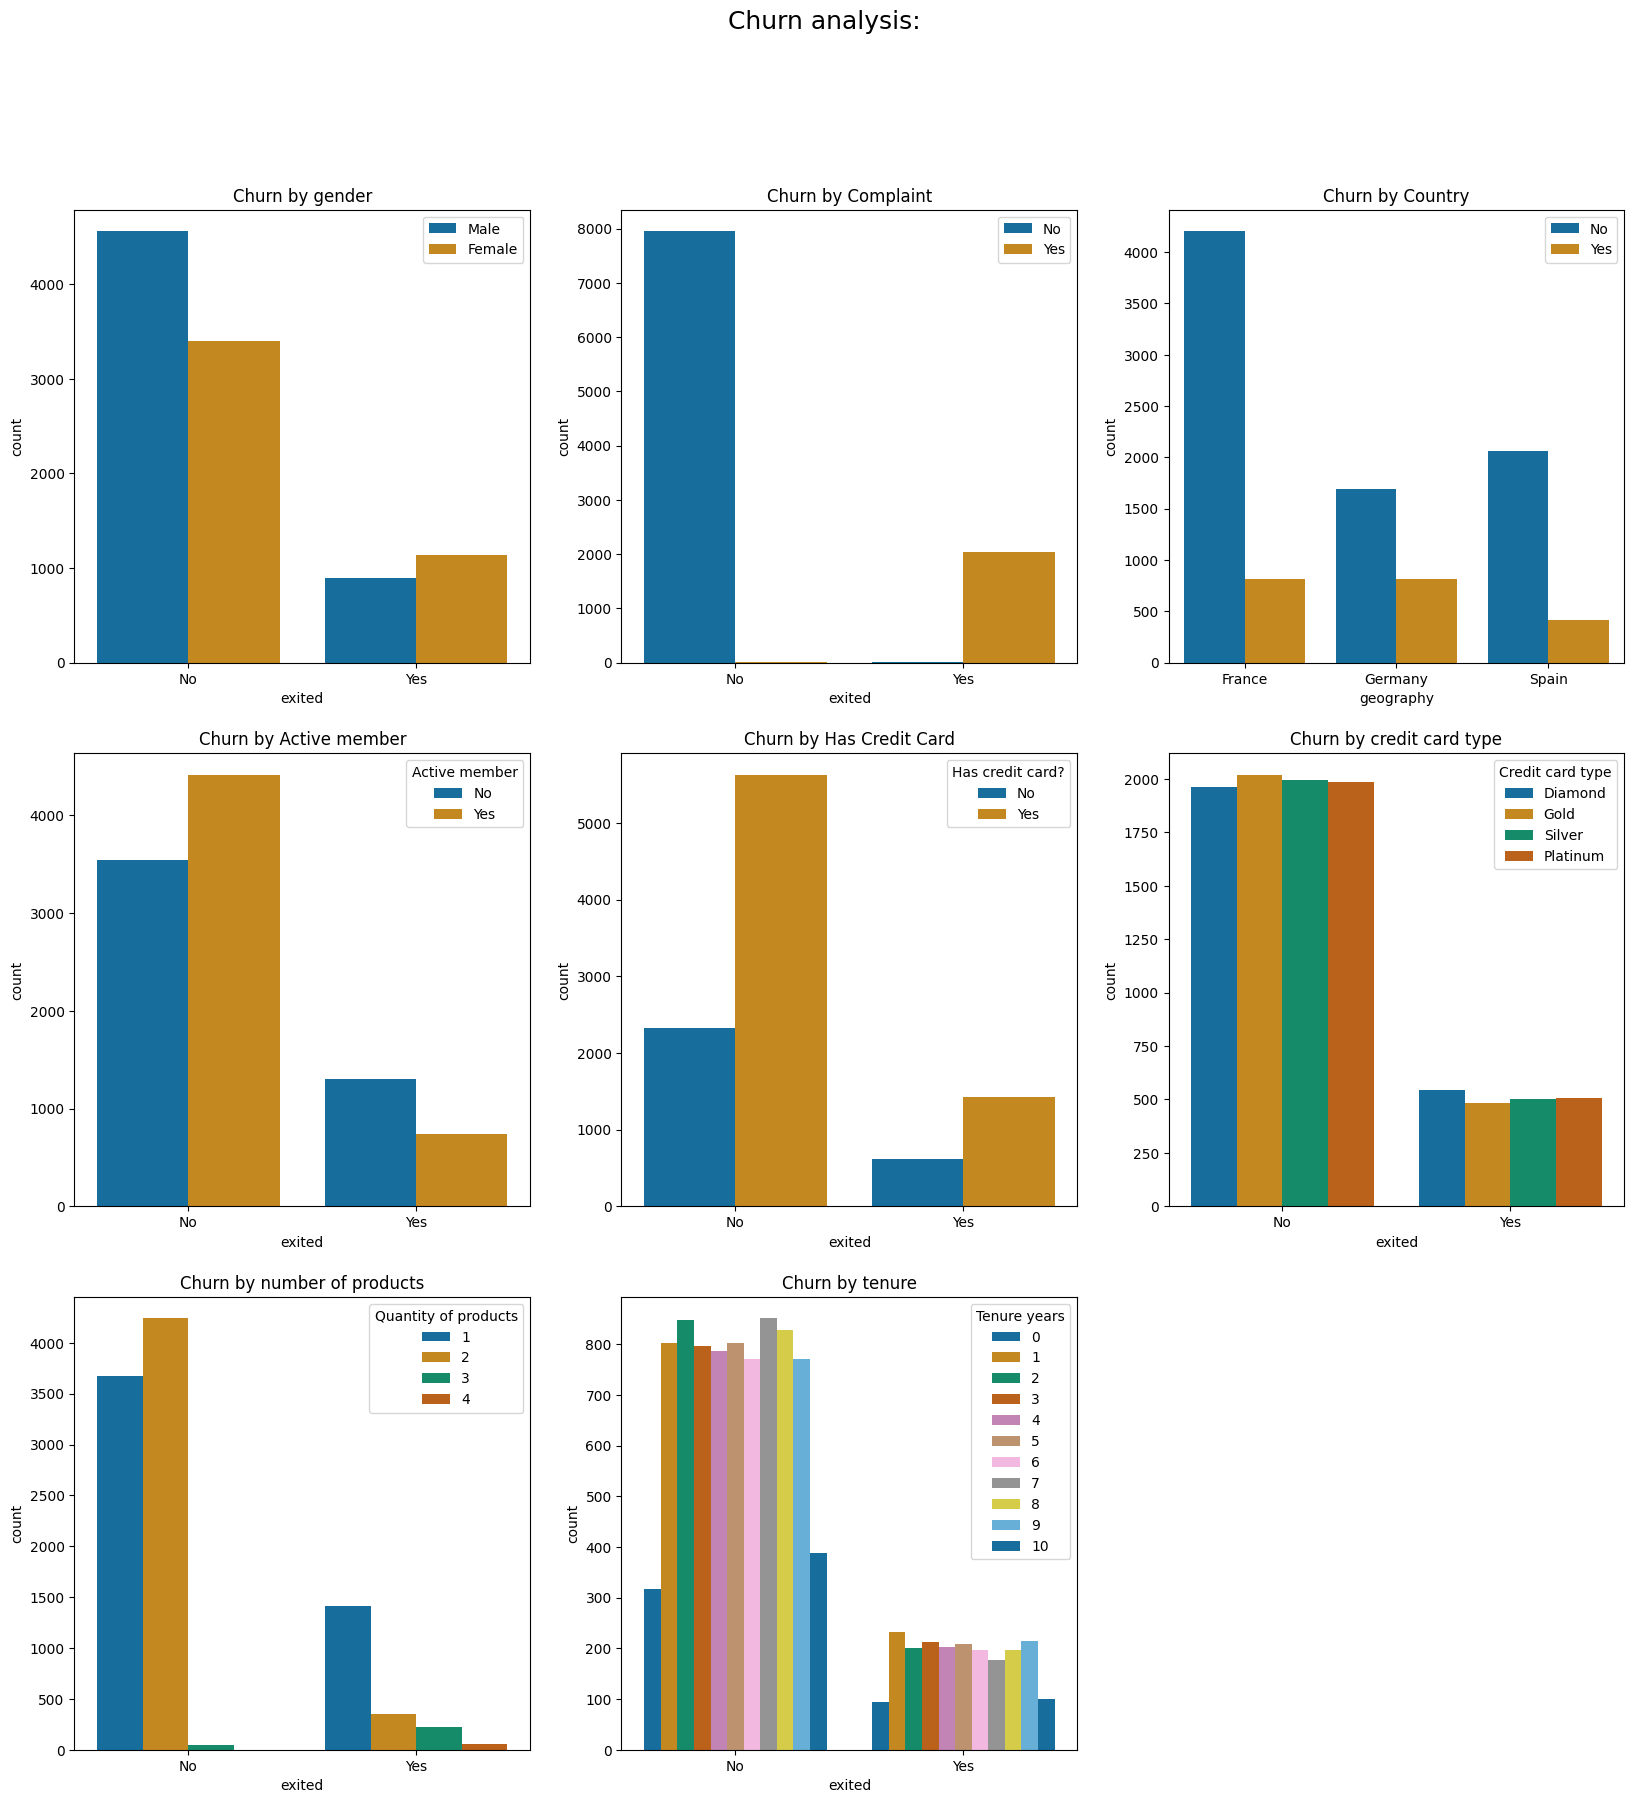

In [81]:
fig, ax = plt.subplots(3,3, figsize=(20,20))
fig.suptitle('Churn analysis:', fontsize=18)

sns.countplot(ax=ax[0,0], data=data, x='exited', hue='gender', palette='colorblind')
ax[0,0].set_xticklabels(('No', 'Yes'))
ax[0,0].set_title('Churn by gender')
ax[0,0].legend(labels=['Male', 'Female'])

sns.countplot(ax=ax[0,1], data=data, x='exited', hue='complain', palette='colorblind')
ax[0,1].legend(labels=['No', 'Yes'])
ax[0,1].set_xticklabels(('No', 'Yes'))
ax[0,1].set_title('Churn by Complaint')

sns.countplot(ax=ax[0,2], data=data, x='geography', hue='exited', palette='colorblind')
ax[0,2].legend(labels=['No', 'Yes'])
ax[0,2].set_xticklabels(('France', 'Germany', 'Spain'))
ax[0,2].set_title('Churn by Country')

sns.countplot(ax=ax[1,0], data=data, x='exited', hue='is_active_member', palette='colorblind')
ax[1,0].set_xticklabels(('No', 'Yes'))
ax[1,0].set_title('Churn by Active member')
ax[1,0].legend(title='Active member', labels=['No', 'Yes'])

sns.countplot(ax=ax[1,1], data=data, x='exited', hue='has_crd_card', palette='colorblind')
ax[1,1].set_xticklabels(('No', 'Yes'))
ax[1,1].set_title('Churn by Has Credit Card')
ax[1,1].legend(title='Has credit card?', labels=['No', 'Yes'])

sns.countplot(ax=ax[1,2], data=data, x='exited', hue='card_type', palette='colorblind')
ax[1,2].set_xticklabels(('No', 'Yes'))
ax[1,2].set_title('Churn by credit card type')
ax[1,2].legend(title='Credit card type', labels=['Diamond', 'Gold', 'Silver', 'Platinum'])

sns.countplot(ax=ax[2,0], data=data, x='exited', hue='num_of_products', palette='colorblind')
ax[2,0].set_xticklabels(('No', 'Yes'))
ax[2,0].set_title('Churn by number of products')
ax[2,0].legend(title='Quantity of products')

sns.countplot(ax=ax[2,1], data=data, x='exited', hue='tenure', palette='colorblind')
ax[2,1].set_xticklabels(('No', 'Yes'))
ax[2,1].set_title('Churn by tenure')
ax[2,1].legend(title='Tenure years')

ax[2,2].axis('off')

In [82]:
exit_index = {0:"Hasn't exited", 1:'Has exited'}
france_data = data[['exited', 'geography']].query('geography == 1')
germany_data = data[['exited', 'geography']].query('geography == 2')
spain_data = data[['exited', 'geography']].query('geography == 3')
print(f'General share of churn \n{data.exited.value_counts(normalize=True).mul(100).round(2).rename(index=exit_index).astype(str) + "%"}\n \n\
In France \n{france_data.exited.value_counts(normalize=True).mul(100).round(2).rename(index=exit_index).astype(str) + "%"}\n \n\
In Germany \n{germany_data.exited.value_counts(normalize=True).mul(100).round(2).rename(index=exit_index).astype(str) + "%"}\n \n\
In Spain \n{spain_data.exited.value_counts(normalize=True).mul(100).round(2).rename(index=exit_index).astype(str) + "%"}')

General share of churn 
Hasn't exited    79.62%
Has exited       20.38%
Name: exited, dtype: object
 
In France 
Hasn't exited    83.83%
Has exited       16.17%
Name: exited, dtype: object
 
In Germany 
Hasn't exited    67.56%
Has exited       32.44%
Name: exited, dtype: object
 
In Spain 
Hasn't exited    83.33%
Has exited       16.67%
Name: exited, dtype: object


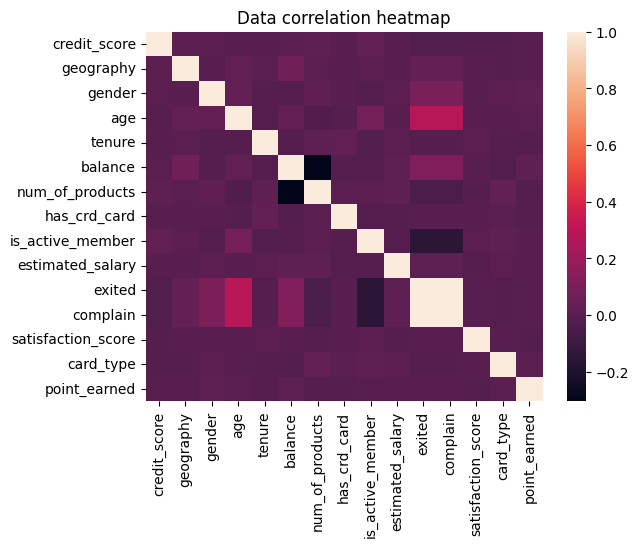

In [83]:
ax = sns.heatmap(data.corr())
ax.set_title('Data correlation heatmap')
ax = ax

Conclusion:

(1) Women quantity that churn are greater than the men.

(2) Clients who complained has almost 100% of churning than the ones who hasn't complained. This requires further investigation as to see the reason of their complaint.

(3) As seen before, the country with biggest quantity of clients is France, followed by Germany and Spain, the last two has almost same quantity. But Germany presents the double of churn share compared to France and Spain, which requires further investigation.

(4) Active clients shows tendency to not churn.

(5) The fact that the clients have or don't have credit card, doesn't seem to have any effect on churn.

(6) Same as previous point, the credit card type doesn't seem to have any specific behavior toward churning.

(7) Clients who has 2 products tend to not leave the bank.

(8) Based on Pearson's correlation, the age and gender seems to have some correlation to churn (exited).

### Relationship test

In [84]:
def relation_significance_test(column_name, test_type):
  significance = 0.05
  if test_type == 'chi2':
    contingency_table = pd.crosstab(data.exited, data[column_name])
    _, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value <= significance:
      print(f'Null hypothesis rejected. There is a significant relation between {column_name} and churn.')
    else:
      print(f'Null hypothesis accepted. There is NO significant relation between {column_name} and churn.')

  if test_type == 't-test':
    churned = data.query('exited == 1')
    not_churned = data.query('exited == 0')
    _, p_value = ttest_ind(churned[column_name], not_churned[column_name], equal_var=True)
    if p_value <= significance:
      print(f'Null hypothesis rejected. There is a significant relation between {column_name} and churn.')
    else:
      print(f'Null hypothesis accepted. There is NO significant relation between {column_name} and churn.')


In [85]:
for column_name in data.columns:
  relation_significance_test(column_name, 'chi2')

Null hypothesis accepted. There is NO significant relation between credit_score and churn.
Null hypothesis rejected. There is a significant relation between geography and churn.
Null hypothesis rejected. There is a significant relation between gender and churn.
Null hypothesis rejected. There is a significant relation between age and churn.
Null hypothesis accepted. There is NO significant relation between tenure and churn.
Null hypothesis rejected. There is a significant relation between balance and churn.
Null hypothesis rejected. There is a significant relation between num_of_products and churn.
Null hypothesis accepted. There is NO significant relation between has_crd_card and churn.
Null hypothesis rejected. There is a significant relation between is_active_member and churn.
Null hypothesis accepted. There is NO significant relation between estimated_salary and churn.
Null hypothesis rejected. There is a significant relation between exited and churn.
Null hypothesis rejected. Ther

In [86]:
for column_name in data.columns:
  relation_significance_test(column_name, 't-test')

Null hypothesis rejected. There is a significant relation between credit_score and churn.
Null hypothesis rejected. There is a significant relation between geography and churn.
Null hypothesis rejected. There is a significant relation between gender and churn.
Null hypothesis rejected. There is a significant relation between age and churn.
Null hypothesis accepted. There is NO significant relation between tenure and churn.
Null hypothesis rejected. There is a significant relation between balance and churn.
Null hypothesis rejected. There is a significant relation between num_of_products and churn.
Null hypothesis accepted. There is NO significant relation between has_crd_card and churn.
Null hypothesis rejected. There is a significant relation between is_active_member and churn.
Null hypothesis accepted. There is NO significant relation between estimated_salary and churn.
Null hypothesis rejected. There is a significant relation between exited and churn.
Null hypothesis rejected. There

<ipython-input-84-a1d988feb5fa>:14: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  _, p_value = ttest_ind(churned[column_name], not_churned[column_name], equal_var=True)


Variables that has significant relationship with churn (exited, in dataset), are as per below:

(1) Credit score;*

* This variable diverged between chi-squared and t-test. So, I chose to add it to ML model as it improves the accuracy in 1,6%.

(2) Geography;

(3) Gender;

(4) Age;

(5) Balance;

(6) Number of products;

(7) Active or not;

### Age analysis

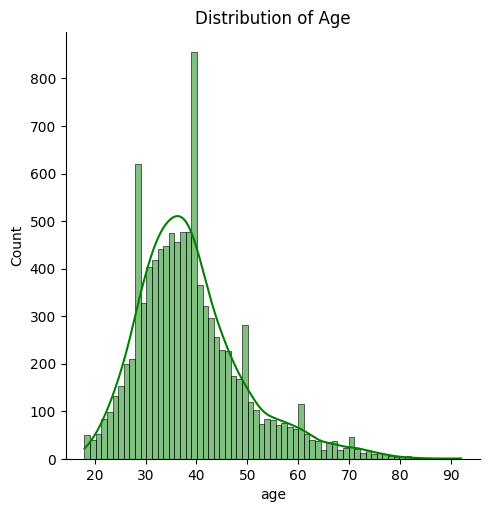

In [87]:
ax = sns.displot(data.age, kind='hist', color='green', kde=True)
ax.set(title='Distribution of Age')
ax = ax

The age data's Ditribution graph is skewed to the right, which indicates a higher population in the range of 30 to 40's, with a higher peak on 40's within a age range from 18 to 90.

#### Normality test

In [88]:
from scipy.stats import normaltest

$H_0$ is the null hypothesis which states that the population is normally distributed.

In [89]:
significance = 0.05

In [90]:
stat_test, p_value = normaltest(data.age)
print(stat_test, p_value)

1507.7908881363314 0.0


In [91]:
p_value <= significance

True

As the p_value is less than 5% (significance), the null hypothesys ($H_0$) is rejected. This means that the age data is not normally distributed.

$H_0$ - There is no association between churn and age

$H_1$ = There is an association between churn and age

In [92]:
from scipy.stats import chi2_contingency

In [93]:
cont_table = pd.crosstab(data.exited, data.age)
cont_table

age,18,19,20,21,22,23,24,25,26,27,...,78,79,80,81,82,83,84,85,88,92
exited,,,,,,,,,,,,,,,,,,,,,
0,20,26,38,50,72,93,118,148,186,196,...,5,4,3,4,1,1,1,1,1,2
1,2,1,2,3,12,6,14,6,14,13,...,0,0,0,0,0,0,1,0,0,0


In [94]:
chi_2, p_value, _, _ = chi2_contingency(cont_table)
p_value

4.9062494785923104e-290

In [95]:
p_value <= significance

True

Using chi-square test, the p_value is lower than significance level, we reject the null hypothesis which states that there is an associtation between age and churn.

In [96]:
data.columns

Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_crd_card', 'is_active_member',
       'estimated_salary', 'exited', 'complain', 'satisfaction_score',
       'card_type', 'point_earned'],
      dtype='object')

(0.0, 1.0, 0.0, 1.0)

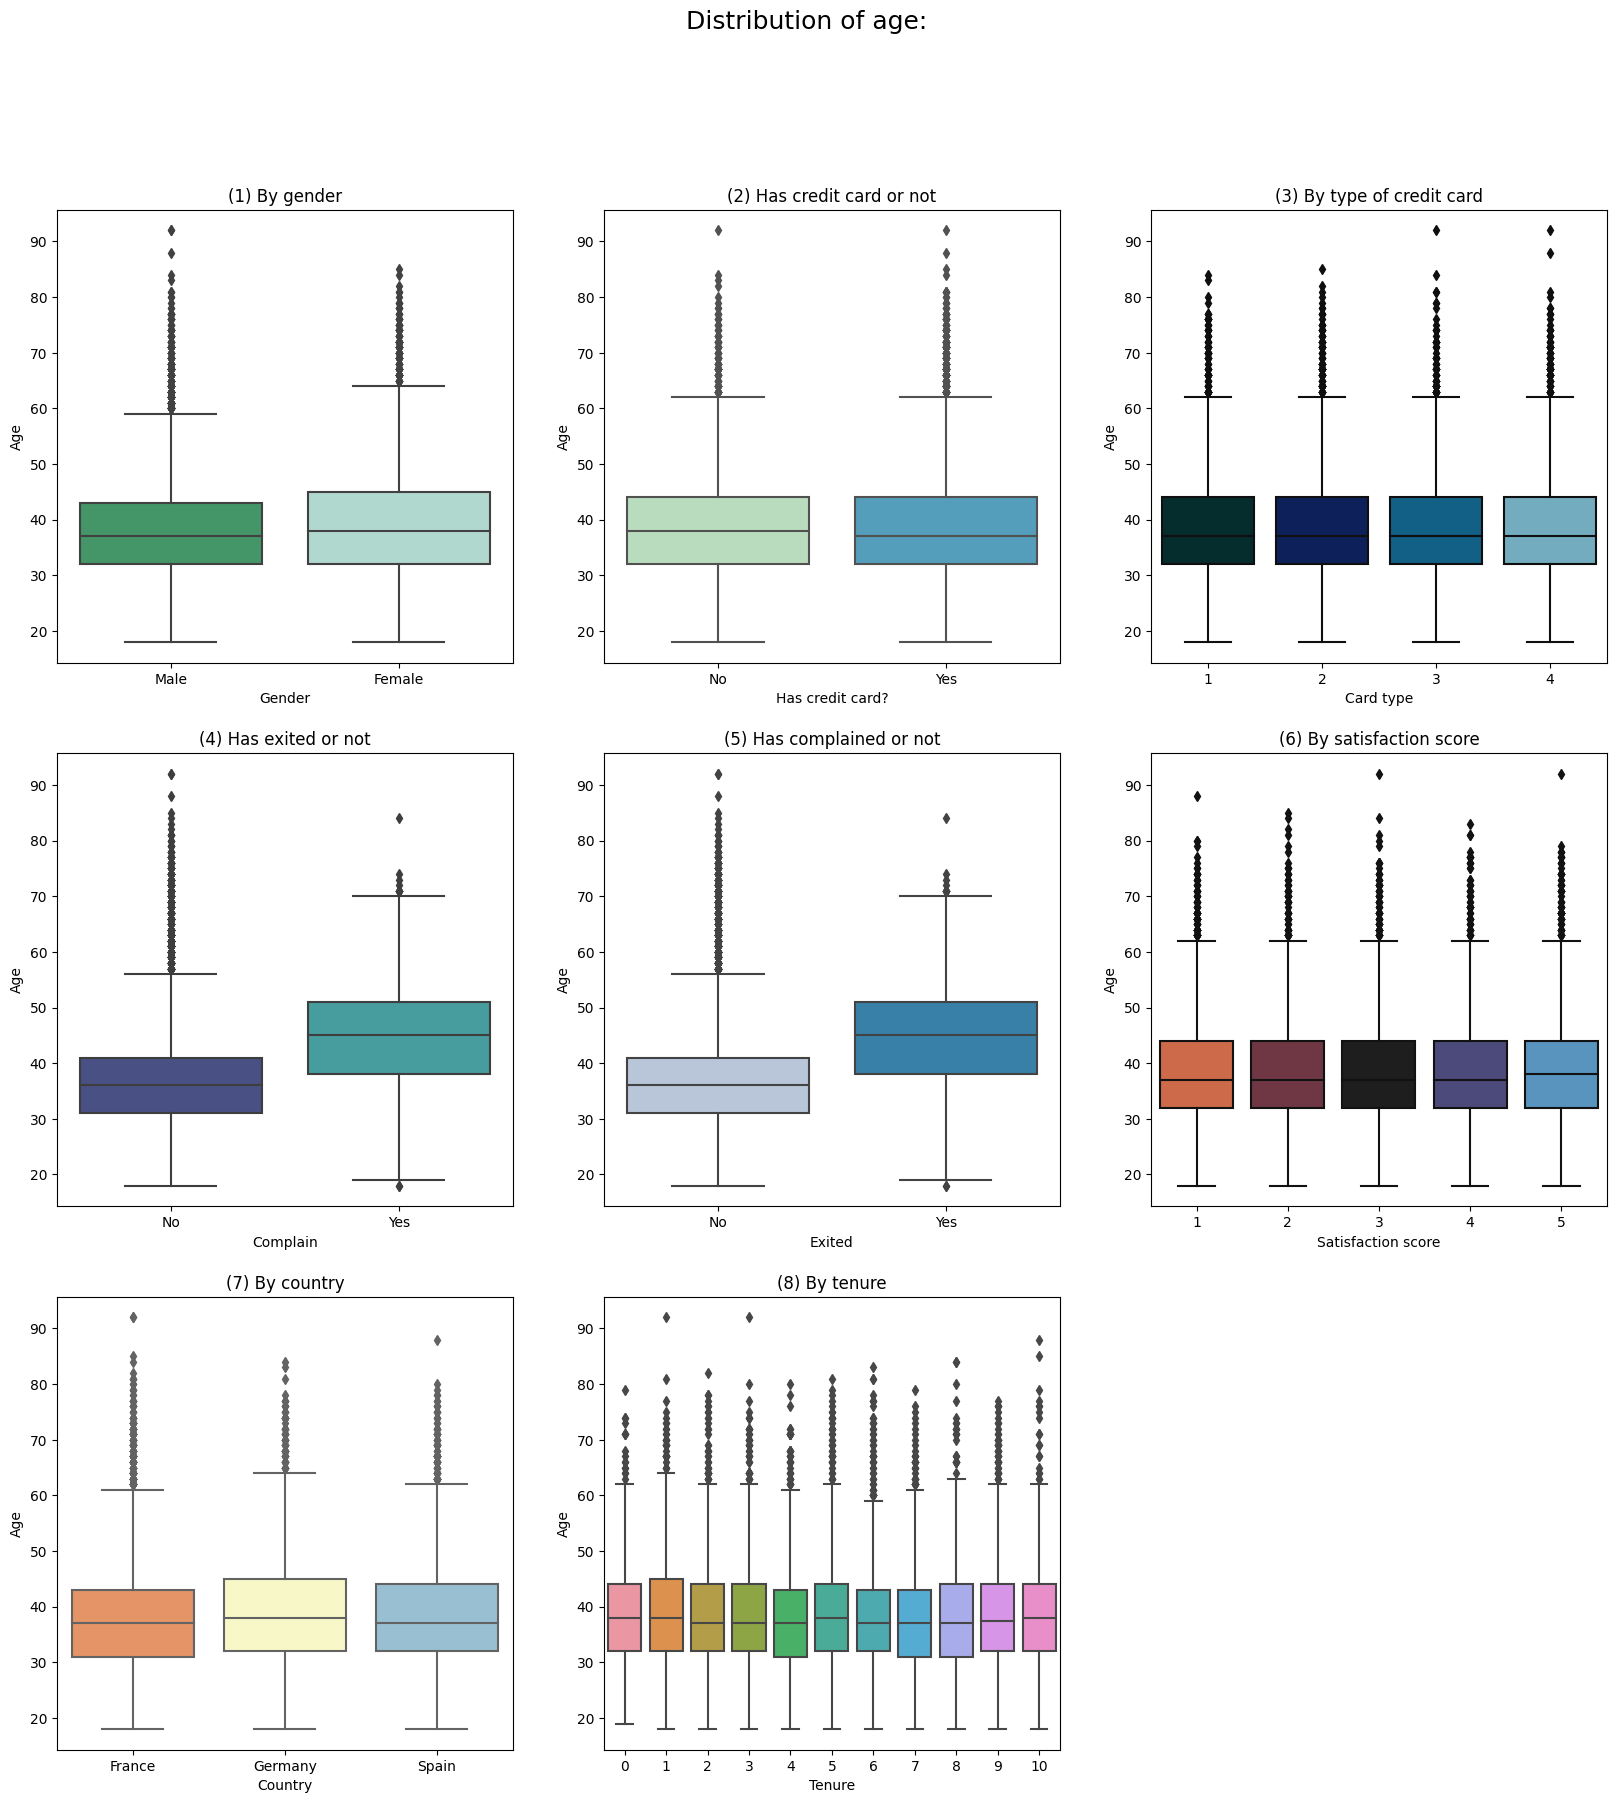

In [97]:
fig, ax = plt.subplots(3,3, figsize=(20,20))
fig.suptitle('Distribution of age:', fontsize=18)
sns.boxplot(ax=ax[0,0], data=data, x='gender', y='age', palette='BuGn_r')
ax[0,0].set_title('(1) By gender')
ax[0,0].set_xlabel('Gender')
ax[0,0].set_ylabel('Age')
ax[0,0].set_xticklabels(('Male', 'Female'))

sns.boxplot(ax=ax[0,1], data=data, x='has_crd_card', y='age', palette='GnBu')
ax[0,1].set_title('(2) Has credit card or not')
ax[0,1].set_xlabel('Has credit card?')
ax[0,1].set_ylabel('Age')
ax[0,1].set_xticklabels(('No', 'Yes'))

sns.boxplot(ax=ax[0,2], data=data, x='card_type', y='age', palette='ocean')
ax[0,2].set_title('(3) By type of credit card')
ax[0,2].set_xlabel('Card type')
ax[0,2].set_ylabel('Age')

sns.boxplot(ax=ax[1,0], data=data, x='exited', y='age', palette='mako')
ax[1,0].set_title('(4) Has exited or not')
ax[1,0].set_xlabel('Complain')
ax[1,0].set_ylabel('Age')
ax[1,0].set_xticklabels(('No', 'Yes'))

sns.boxplot(ax=ax[1,1], data=data, x='complain', y='age', palette='PuBu')
ax[1,1].set_title('(5) Has complained or not')
ax[1,1].set_xlabel('Exited')
ax[1,1].set_ylabel('Age')
ax[1,1].set_xticklabels(('No', 'Yes'))

sns.boxplot(ax=ax[1,2], data=data, x='satisfaction_score', y='age', palette='icefire_r')
ax[1,2].set_title('(6) By satisfaction score')
ax[1,2].set_xlabel('Satisfaction score')
ax[1,2].set_ylabel('Age')

sns.boxplot(ax=ax[2,0], data=data, x='geography', y='age', palette='RdYlBu')
ax[2,0].set_title('(7) By country')
ax[2,0].set_xlabel('Country')
ax[2,0].set_ylabel('Age')
ax[2,0].set_xticklabels(('France', 'Germany', 'Spain'))

sns.boxplot(ax=ax[2,1], data=data, x='tenure', y='age')
ax[2,1].set_title('(8) By tenure')
ax[2,1].set_xlabel('Tenure')
ax[2,1].set_ylabel('Age')

ax[2,2].axis('off')

(1) Gender - The age distribution per gender shows that females are slightly older than males in this dataset.  

(2) Credit card owner - Clients who owns a credit has almost the same age distribution as the ones that do own a credit card.

(3) Card types - Has the same distribution of age.

(4) Complain - Clients in age range of 38~50 are the ones complaining more.

(5) Exited - Same as point 4, clients in the range of 38~50 are churning. There may be a relation with the ones that complained and exited.

(6) Satisfaction score - Has almost the same distribution of age.

(7) Country - France's clients distribution are slighly younger than clients from Germany and Spain.

(8) Tenure - The age distribution is the same between the years.

# Estimating prediction model

In [98]:
data.corr().exited.round(4)

credit_score         -0.0268
geography             0.0357
gender                0.1063
age                   0.2853
tenure               -0.0137
balance               0.1186
num_of_products      -0.0476
has_crd_card         -0.0070
is_active_member     -0.1564
estimated_salary      0.0125
exited                1.0000
complain              0.9957
satisfaction_score   -0.0058
card_type            -0.0095
point_earned         -0.0046
Name: exited, dtype: float64

## Balancing the Churn data

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

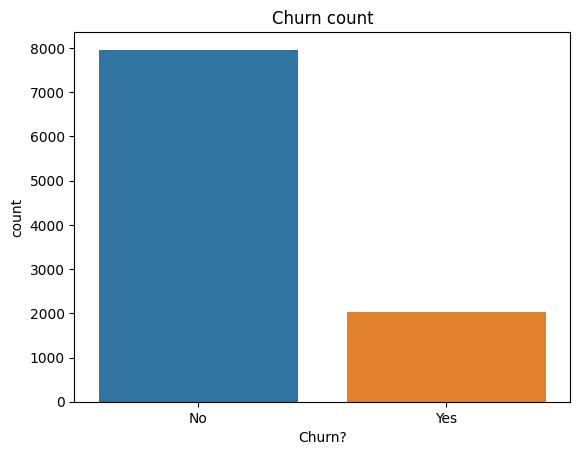

In [99]:
ax = sns.countplot(x='exited', data=data)
ax.set_title('Churn count')
ax.set_xlabel('Churn?')
ax.set_xticklabels(('No', 'Yes'))

In [100]:
X = pd.DataFrame(data[['geography', 'gender', 'age',
                       'balance', 'num_of_products',
                       'is_active_member', 'credit_score']])
y = pd.Series(data.exited)

In [101]:
smt = SMOTE(random_state=123)
X, y = smt.fit_resample(X, y)

In [102]:
rebalanced_data = pd.concat([X, y], axis = 1)
rebalanced_data.head()

,geography,gender,age,balance,num_of_products,is_active_member,credit_score,exited
0,1,1,42,0.00,1,1,619,1
1,3,1,41,83807.86,1,1,608,0
2,1,1,42,159660.80,3,0,502,1
3,1,1,39,0.00,2,0,699,0
4,3,1,43,125510.82,1,1,850,0


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

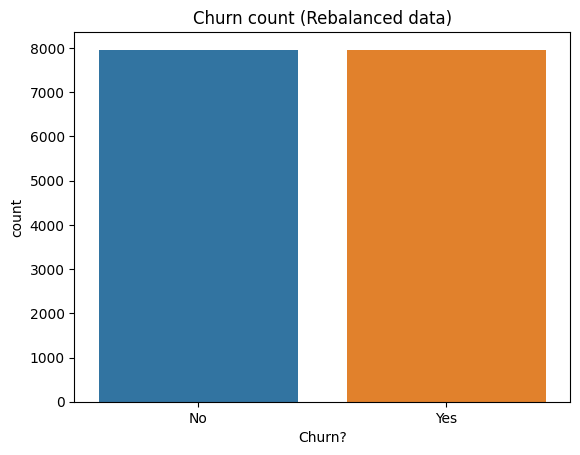

In [103]:
ax = sns.countplot(x='exited', data=rebalanced_data)
ax.set_title('Churn count (Rebalanced data)')
ax.set_xlabel('Churn?')
ax.set_xticklabels(('No', 'Yes'))

## Creating test and train datasets

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2000)

In [105]:
print(f'X_train = {len(X_train)}, X_test = {len(X_test)}, Total {len(X_train) + len(X_test)}')
print(f'y_train = {len(y_train)}, y_test = {len(y_test)}, Total {len(y_train) + len(y_test)}')

X_train = 11146, X_test = 4778, Total 15924
y_train = 11146, y_test = 4778, Total 15924


## *DecisionTree* machine learning model

In [106]:
dtree_model = DecisionTreeClassifier()

In [107]:
dtree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [108]:
y_tree_predict = dtree_model.predict(X_test)
print(f'Accuracy score for Decision Tree model = {(metrics.accuracy_score(y_test, y_tree_predict) * 100).round(2)}%')

Accuracy score for Decision Tree model = 78.63%


In [109]:
y_train_predict = dtree_model.predict(X_train)

## *RandomForest* machine learning model

In [110]:
random_forest_model = RandomForestClassifier()

In [111]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [112]:
y_random_forest_predict = random_forest_model.predict(X_test)
print(f'Accuracy score for Random Forest model = {(metrics.accuracy_score(y_test, y_random_forest_predict)*100).round(2)}%')

Accuracy score for Random Forest model = 83.49%


## *SupportVectorMachine* machine learning model

In [113]:
svm_model = svm.SVC()

In [114]:
svm_model.fit(X_train, y_train)

SVC()

In [115]:
y_svm_predict = svm_model.predict(X_test)
print(f'Accuracy score for Support Vector Machine model = {(metrics.accuracy_score(y_test, y_svm_predict)*100).round(2)}%')

Accuracy score for Support Vector Machine model = 57.6%


Conclusion:

Since this is a classification problem (churn:yes or no), we are testing Decision Tree, Random Forest and Support Vector Machine models.
Between all of them, the Random Forest presented the highest accuracy score with 83,49%.

For the model estimation, the complain variable was excluded as almost 100% of clients who has complained churned independently to other variables.
As for the other variables, after a relationship test calculation, both chi-square and t_test, I've decided to exclude tenure, has credit card, estimated salary, satisfaction score, card typ and points earned from the model as well.

In [116]:
X_train.columns

Index(['geography', 'gender', 'age', 'balance', 'num_of_products',
       'is_active_member', 'credit_score'],
      dtype='object')

In [117]:
def bank_churn_prediction(data_frame):
  output = []
  for i in random_forest_model.predict(data_frame):
    if i == 0:
      output.append("Probably won't churn.")
    else:
      output.append("Probably will churn.")

  return output

In [118]:
X_test[0:4]

,geography,gender,age,balance,num_of_products,is_active_member,credit_score
14472,2,1,47,125257.948091,1,0,435
2142,1,0,35,112689.950000,1,0,690
12346,2,0,42,124597.018247,1,0,672
6830,1,0,43,157960.490000,2,0,765


In [119]:
bank_churn_prediction(X_test[0:4])

['Probably will churn.',
 'Probably will churn.',
 'Probably will churn.',
 "Probably won't churn."]

In [120]:
data.query('estimated_salary == 24302.95 or estimated_salary == 174916.85 or estimated_salary == 184036.47 or  estimated_salary == 184399.76')

,credit_score,geography,gender,age,tenure,balance,num_of_products,has_crd_card,is_active_member,estimated_salary,exited,complain,satisfaction_score,card_type,point_earned
866,545,1,0,38,1,88293.13,2,1,1,24302.95,0,0,3,2,331
3877,645,3,0,45,4,0.00,1,0,1,174916.85,1,1,5,4,668
6677,642,3,0,26,8,144238.70,1,1,1,184399.76,0,0,3,4,649
8360,686,2,0,33,9,141918.09,2,0,1,184036.47,0,0,4,2,976


## Conclusion

After all the analysis, tests and regression tests, I've come to the following conclusion:

(1) The prediction model chosen was the Random Forest, with the accuracy rate of 83,49%.

(2) Clients who placed a complaint, are the ones that almost 100% of times, churned. Therefore, it was excluded from the ML model. And a more qualitative and detailed analysis of the complaints is necessary so the company can improve the churn issue specifically for this topic.

(3) The prediction model takes country, gender, age, balance, number of products, is an active client and his credit score to have a prediction of churn possibility.